In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df_AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df_ReadmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
df_Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df_Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
df_EDunique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")

## 1. Replace all the null values in ReadmissionFlag with 0.

In [11]:
df_ReadmissionRegistry["ReadmissionFlag"].fillna(0, inplace = True)
df_ReadmissionRegistry

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


## 2.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [22]:
RFV = input("Enter Reason for visit: ").title()
Count_RFV = len(df_EDvisits[df_EDvisits["ReasonForVisit"]==RFV])
print(Count_RFV)

Enter Reason for visit:  migraine


156


## 3.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

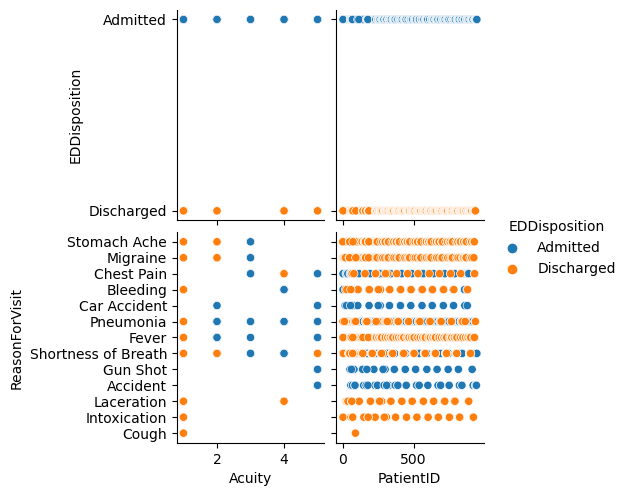

In [52]:
sns.pairplot(data=df_EDvisits, hue="EDDisposition", x_vars=["Acuity","PatientID"], y_vars=["EDDisposition","ReasonForVisit"])
#sns.pairplot(data=df_Providers, hue="ProviderSpecialty", kind="hist", x_vars=["ProviderSpecialty"], y_vars=["ProviderID"])

In [53]:
Count_Spanish = len(df_Patients[df_Patients["Language"]=="Spanish"])
print(Count_Spanish)

110


## 5. Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)

## 6. Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [58]:
LOS = float(input("Enter Length of Stay:"))
Patients_LOS = (df_ReadmissionRegistry[df_ReadmissionRegistry["ExpectedLOS"]>LOS])
Patients_LOS

Enter Length of Stay: 10


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
6,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198,1.0,5.0,1.0
8,355,10,2018-01-01,2018-01-07 20:50:16.780,Transfer,ICU,Stroke,14.787084,0.106645,1.0,5.0,1.0
9,54,11,2018-01-01,2018-01-08 19:53:38.845,Home,Hospitalist,Pneumonia,12.081905,0.932385,1.0,6.0,1.0
12,18,14,2018-01-18,2018-01-25 14:43:35.285,Home,General Medicine,Stroke,10.060740,0.253516,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
708,586,731,2018-02-22,2018-03-03 21:51:47.920,Home,Cardiology,Heart Failure,15.435455,0.361812,1.0,1.0,1.0
710,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892,1.0,3.0,1.0
714,533,737,2018-02-22,2018-03-07 19:50:58.083,Home,ICU,Pneumonia,10.563688,0.583075,NaN,NaN,NaN
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN


## 7.Create a bar chart between expectedLOS & Primary diagnosis.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Pneumonia'),
  Text(1, 0, 'AMI'),
  Text(2, 0, 'Heart Failure'),
  Text(3, 0, 'Stroke'),
  Text(4, 0, 'Spinal Cord Injury'),
  Text(5, 0, 'Afib'),
  Text(6, 0, 'Migraine'),
  Text(7, 0, 'Pain'),
  Text(8, 0, 'Flu'),
  Text(9, 0, 'Laceration'),
  Text(10, 0, 'Diabetes'),
  Text(11, 0, 'Kidney Failure'),
  Text(12, 0, 'Fever'),
  Text(13, 0, 'Hypertension'),
  Text(14, 0, 'Broken Leg'),
  Text(15, 0, 'Knee Replacement'),
  Text(16, 0, 'Hip Fracture')])

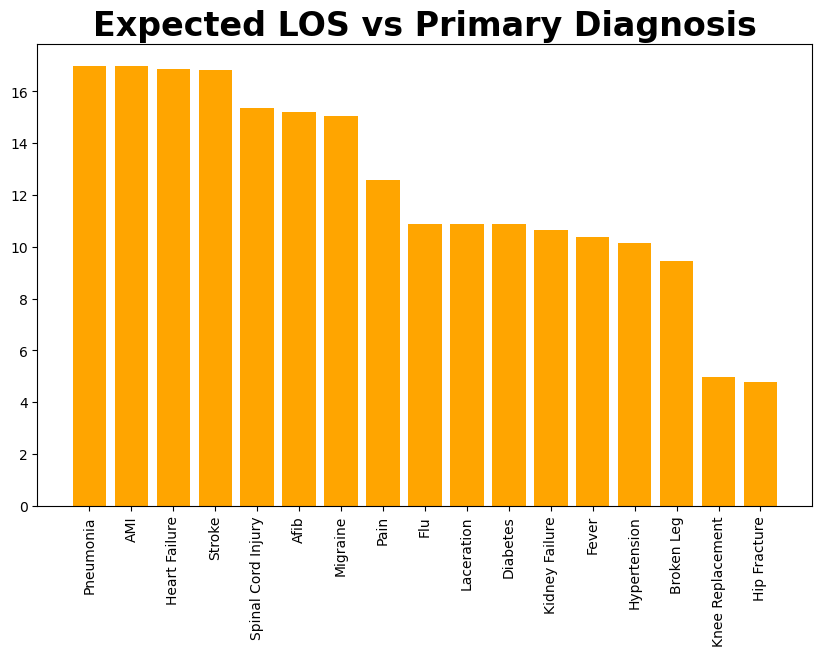

In [26]:
plt.figure(figsize=(10,6))

df_sorted = df_ReadmissionRegistry.sort_values("ExpectedLOS",ascending=False)

 
plt.bar(x=df_sorted["PrimaryDiagnosis"],
 
        height=df_sorted["ExpectedLOS"], color="orange")

plt.title("Expected LOS vs Primary Diagnosis", fontsize=24, fontweight="bold")
 
plt.xticks(rotation=90)


## 8.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

## 9. Using numpy functions, multiply the following arrays : a=np.arange(6).reshape(2,3), b=np.arange(6).reshape(3,2)

## 10.Display data by splitting age in 4 quartiles and labeling the quartiles.